In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error ,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
tr = pd.read_csv("/Users/hajiaga/Downloads/titanic/train.csv")
te = pd.read_csv("/Users/hajiaga/Downloads/titanic/test.csv")

In [183]:
data = pd.concat([tr,te],axis = 0)
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)


In [184]:
def detect_outliers(data,col):
    Q1 = data[col].quantile(0.05)
    Q2 = data[col].quantile(0.95)
    IQR = Q2-Q1
    lower_bound = Q1-IQR*1.5
    higher_bound = Q2+IQR*1.5
    data.drop(data[data[col]>higher_bound].index ,axis =0, inplace=True)
    data.drop(data[data[col]<lower_bound].index , axis = 0, inplace=True)


In [192]:
num_cols = data.select_dtypes("number").columns
data["Cabin"]=data["Cabin"].fillna("None")
data["Age"] = data["Age"].fillna(data["Age"].dropna().median ,inplace=True)

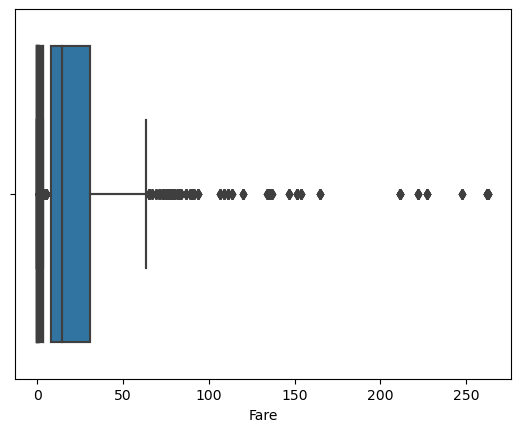

In [193]:
for i in num_cols:
    sns.boxplot(data = data, x = i)
    detect_outliers(data,i)
    sns.boxplot(data = data, x = i)
# I used this code to look at my outlier detecter's impoct on my data ,but then deleted because it will be a big output

In [194]:
def evaluate(model,X,Y):
    X_tr,X_te,y_tr,y_te = train_test_split(X,Y,test_size=0.8,random_state=42,shuffle=True)
    model.fit(X_tr,y_te)
    pr = model.predict(X_te)
    rslt = accuracy_score(y_te,pr)
    return rslt

In [195]:
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])

In [196]:
Y = data[:821]["Survived"]
X = data[:821].drop(["Survived"],axis=1)

In [197]:
np.median(data[data["Sex"]=="male"].select_dtypes("number"))
for i in X.columns:
    print(X[i].isna().sum() , i)

0 Pclass
0 Sex
821 Age
0 SibSp
0 Parch
0 Fare
0 Cabin
2 Embarked


/Users/hajiaga/anaconda3/envs/unsupervisedLearning/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hajiaga/anaconda3/envs/unsupervisedLearning/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [198]:
#model creation
pipeline_log = Pipeline([("model itself",LogisticRegression())])
print(evaluate(pipeline_log,X,Y))

ValueError: could not convert string to float: 'None'